<a href="https://colab.research.google.com/github/smartgrids-aau/GreenCodesPython/blob/main/Exemple_1_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

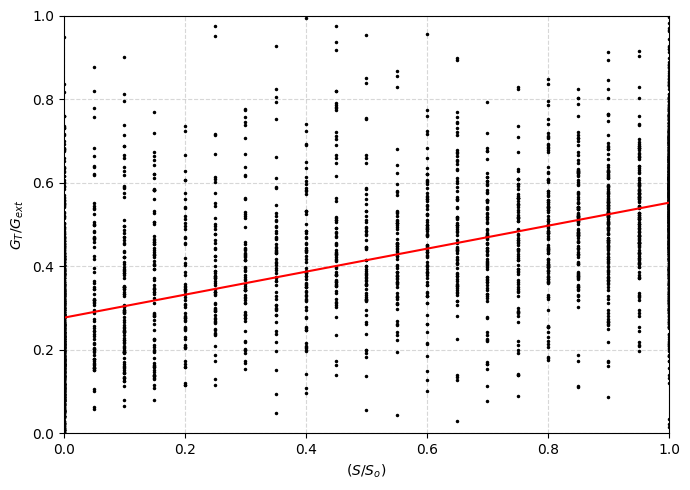

In [8]:
#Example 1.7
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


file_path = '/content/PV Modeling Book Data Source.csv'
data = pd.read_csv(file_path)


N = pd.to_numeric(data.iloc[:, 2], errors='coerce')
LMT = pd.to_numeric(data.iloc[:, 3], errors='coerce')
G_T = pd.to_numeric(data.iloc[:, 4], errors='coerce')
S_So = pd.to_numeric(data.iloc[:, 8], errors='coerce')


valid = N.notna() & LMT.notna() & G_T.notna() & S_So.notna()
N = N[valid].to_numpy()
LMT = LMT[valid].to_numpy()
G_T = G_T[valid].to_numpy()
S_So = S_So[valid].to_numpy()

# Constants
L = 3.11  # Latitude
Go = 1367  # Solar constant

# Solar calculations
Ts = LMT
Ds = 23.45 * np.sin(np.radians((360 * (N - 81)) / 365))
Hs = 15 * (Ts - 12)

sin_Alpha = (np.sin(np.radians(L)) * np.sin(np.radians(Ds)) +
             np.cos(np.radians(L)) * np.cos(np.radians(Ds)) * np.cos(np.radians(Hs)))

Gext = Go * (1 + 0.0333 * np.cos(np.radians(360 * N / 365)))
GextH = Gext * sin_Alpha
G_T_G_ext = G_T / GextH


valid_mask = np.isfinite(G_T_G_ext) & np.isfinite(S_So)
G_T_G_ext = G_T_G_ext[valid_mask]
S_So = S_So[valid_mask]


P_Liner = np.polyfit(S_So, G_T_G_ext, 1)
X_Liner = np.linspace(0, 1, 100)
Y_Liner = np.polyval(P_Liner, X_Liner)

# Plotting
plt.figure(figsize=(7, 5))
plt.plot(S_So, G_T_G_ext, 'k.', markersize=3)
plt.plot(X_Liner, Y_Liner, 'r-', linewidth=1.5)
plt.xlabel(r'$(S/S_o)$')
plt.ylabel(r'$G_T/G_{ext}$')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
